# 이미지 사이즈 보간( cv2.resize )

### 기억하자.
* 종횡비(aspect ratio) - 이미지 높이 대비 이미지 너비의 비율을 의미.(이미지 깨짐에 영향을 줌)
* 보간(Interpolation) - A method of constructing new data within the range of a discrete set of known data points.
* known data points는 원본 이미지의 픽셀정보라고 하자. `보간`은 그렇다면 해당 이미지의 인접합 픽셀정보를 이용해서 이미지의 사이즈를 줄이거나 늘리는 작업이라고 할 수 있다.
* 이미지 사이즈를 줄이는 것이 컴퓨터 비젼 측면에서는 더 효율적이고 시각적으로도 훨씬 낫다. (이미지에 픽셀정보를 제거하는것)
* 이미지 사이즈를 증가시키는 것은 이전 이미지에 없던 픽셀정보를  `interpolation`을 통해 추가해야 하는 작업
* 고해상도 이미지(High-Resolution image)는 사용자에게 매력적이겠지만 컴퓨터 비전 혹은 이미지 처리 측면에서 보면 성능문제를 야기하는 측면이 있음

### 이미지 다운로드 

In [1]:
!wget https://pyimagesearch-code-downloads.s3-us-west-2.amazonaws.com/opencv-resizing/opencv-resizing.zip
!unzip -qq opencv-resizing.zip
%cd opencv-resizing

--2021-04-21 14:07:49--  https://pyimagesearch-code-downloads.s3-us-west-2.amazonaws.com/opencv-resizing/opencv-resizing.zip
Resolving pyimagesearch-code-downloads.s3-us-west-2.amazonaws.com (pyimagesearch-code-downloads.s3-us-west-2.amazonaws.com)... 52.218.136.97
Connecting to pyimagesearch-code-downloads.s3-us-west-2.amazonaws.com (pyimagesearch-code-downloads.s3-us-west-2.amazonaws.com)|52.218.136.97|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 82969 (81K) [application/zip]
Saving to: ‘opencv-resizing.zip’

opencv-resizing.zip 100%[===================>]  81.02K   499KB/s    in 0.2s    

2021-04-21 14:07:49 (499 KB/s) - ‘opencv-resizing.zip’ saved [82969/82969]

/content/opencv-resizing


## 코드 수행

### 패키지 임포트 

In [3]:
# import the necessary packages
import matplotlib.pyplot as plt
import cv2
import argparse
import numpy as np
import imutils

### 코랩 혹은 쥬피터 노트북에서 이미지 표출 함수 

In [4]:
def plt_imshow(title, image):
  '''
  이미지를 인자로 받아 BRG포맷을 RGB포맷으로 변환하여 
  이미지를 화면에 표출
  '''
  image = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)
  plt.title(title)
  plt.imshow(image)
  plt.grid(False)
  plt.show()

### OpenCV를 이용한 이미지 크기 조정

In [6]:
# 파이썬으로 작성된 스크립트를 콘솔에서 수행시 인자 파싱 기능
# ap = argparse.ArgumentParser()
# ap.add_argument("-i", "--image", type=str, default="adrian.png",
# 	help="path to the input image")
# args = vars(ap.parse_args())

# 쥬피터, 코랩에서 수행하므로 윗부분 주석 처리 
args = {
    "image": "/content/opencv-resizing/IMG_4918.jpg"  #경로만 주어져도 되고, 파일명을 줘도 상관없음.
}
#args = {
#    "image": "adrian.png"  # 경로를 포함해서 주는것과 이미지명만 주는것의 차이는 뭐지?
#}

In [13]:
help(cv2.resize)

Help on built-in function resize:

resize(...)
    resize(src, dsize[, dst[, fx[, fy[, interpolation]]]]) -> dst
    .   @brief Resizes an image.
    .   
    .   The function resize resizes the image src down to or up to the specified size. Note that the
    .   initial dst type or size are not taken into account. Instead, the size and type are derived from
    .   the `src`,`dsize`,`fx`, and `fy`. If you want to resize src so that it fits the pre-created dst,
    .   you may call the function as follows:
    .   @code
    .       // explicitly specify dsize=dst.size(); fx and fy will be computed from that.
    .       resize(src, dst, dst.size(), 0, 0, interpolation);
    .   @endcode
    .   If you want to decimate the image by factor of 2 in each direction, you can call the function this
    .   way:
    .   @code
    .       // specify fx and fy and let the function compute the destination image size.
    .       resize(src, dst, Size(), 0.5, 0.5, interpolation);
    .   @endcode


(761, 800, 3)

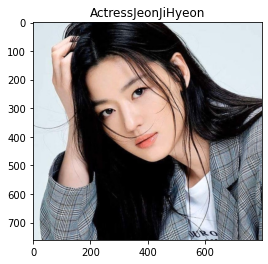

In [25]:
# 이미지 로드 
jeon = cv2.imread(args['image'])
display(jeon.shape)  # (761, 800, 3) - (y, x) = height * width
plt_imshow("ActressJeonJiHyeon", jeon)

#### **`cv2.resize()`**

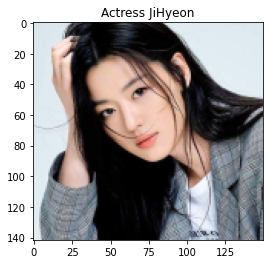

In [26]:
# 이미지 크기를 150픽셀로 조정하되 이미지가 깨지는 것을 
# 방지하기 위해 사이즈 조정할 width와 height를 구하자.

# jeon.shape[1] - origianl image width
r = 150.0 / jeon.shape[1]
dim = (150, int(jeon.shape[0] * r))  # jeon.shape[0] - original image height

# 이미지 보간 적용
# 사이즈는 줄었지만 품질은 이상없음.
resized = cv2.resize(jeon, dim, interpolation=cv2.INTER_AREA)
plt_imshow("Actress JiHyeon", resized)

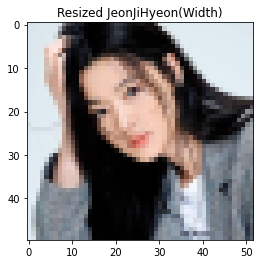

In [27]:
# 이미지 너비 50픽셀로 조정하되, 종횡비를 염두에 두자.
r = 50.0 / jeon.shape[0]
dim = (int(jeon.shape[1] * r), 50)

# 이미지 보간 적용
resized = cv2.resize(jeon,dim, interpolation=cv2.INTER_AREA)
plt_imshow("Resized JeonJiHyeon(Width)", resized)

#### **`imutils.resize`**

In [28]:
help(imutils.resize)

Help on function resize in module imutils.convenience:

resize(image, width=None, height=None, inter=3)



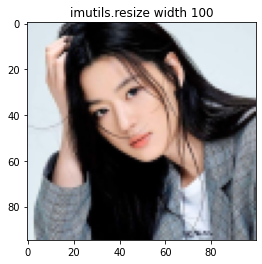

In [34]:
# 닥치고 이미지 사이즈 조정(imutils.resize)
# 위의 방법을 한번에 처리.
resized = imutils.resize(jeon, width=100, inter=cv2.INTER_AREA)
plt_imshow("imutils.resize width {}".format(100), resized)

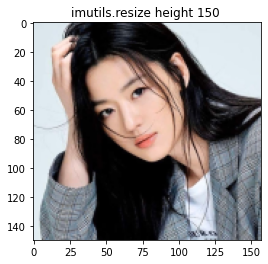

In [33]:
# 닥치고 이미지 사이즈 조정(imutils.resize)
# 위의 방법을 한번에 처리.
resized = imutils.resize(jeon, height=150, inter=cv2.INTER_AREA)
plt_imshow("imutils.resize height {} ".format(150), resized)

### OpenCV의 보간방법 비교


In [6]:
# OpenCV보간을 위한 파라미터
arg = {
    "image":"adrian.png"
}
images = cv2.imread(arg['image'])

[INFO] cv2.INTER_NEAREST


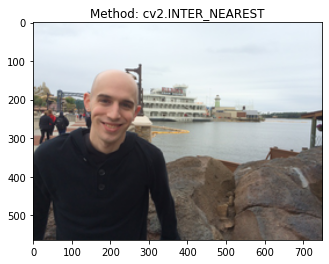

[INFO] cv2.INTER_LINEAR


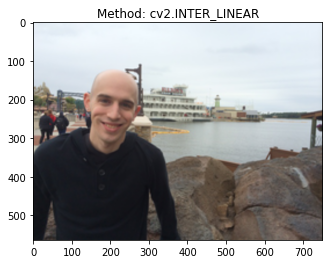

[INFO] cv2.INTER_AREA


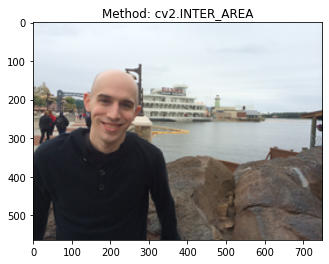

[INFO] cv2.INTER_CUBIC


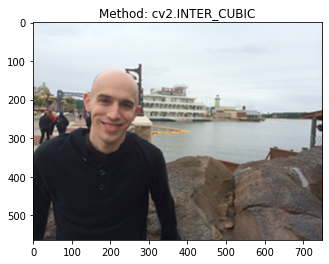

[INFO] cv2.INTER_LANCZOS4


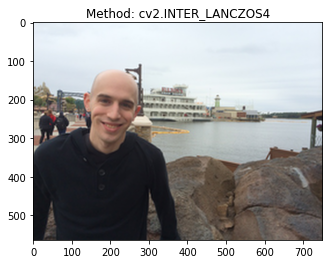

In [7]:
methods = [
	("cv2.INTER_NEAREST", cv2.INTER_NEAREST), #0 from large-sized image to small-sized image
	("cv2.INTER_LINEAR", cv2.INTER_LINEAR),#1    from large-sized image to small-sized image
	("cv2.INTER_AREA", cv2.INTER_AREA),   # 3    from large-sized image to small-sized image
	("cv2.INTER_CUBIC", cv2.INTER_CUBIC), #2  이미지 크기가 작은 사이즈에서 큰 사이즈로 변경이 필요할때 보통 많이 사용함.
	("cv2.INTER_LANCZOS4", cv2.INTER_LANCZOS4)] #4  이미지 크기가 작은 사이즈에서 큰 사이즈로 변경이 필요할때 보통 많이 사용함.

# 보간방법 수만큼 루프
for name, method in methods:
  # 현재 이미지 너비에서 3배 증가
  print("[INFO] {}".format(name))
  resized = imutils.resize(images, width=images.shape[1] * 3,inter=method)
  plt_imshow("Method: {}".format(name), resized)